In [112]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ruptures as rpt

In [113]:
# Read the Excel file into a DataFrame
current_directory = os.path.abspath(os.path.join(os.getcwd(), '../../'))
output_directory = current_directory + '/resources/output/evaluation/incubator/gap tunning/'
# file = 'affine_2P_exp1_ht3_hg2_2P_Modelexp1_ht3_hg2_Real.csv'
# file = 'affine_4P_exp1_ht3_hg2_4P_Modelexp1_ht3_hg2_Real.csv'
# file = 'simple_2P_exp1_ht3_hg2_2P_Modelexp1_ht3_hg2_Real.csv'
file = 'simple_4P_exp1_ht3_hg2_4P_Modelexp1_ht3_hg2_Real.csv'

# file = 'affine_2P_exp2_ht20_hg30_2P_Modelexp2_ht20_hg30_Real.csv'
# file = 'affine_4P_exp2_ht20_hg30_4P_Modelexp2_ht20_hg30_Real.csv'
# file = 'simple_2P_exp2_ht20_hg30_2P_Modelexp2_ht20_hg30_Real.csv'
# file = 'simple_4P_exp2_ht20_hg30_4P_Modelexp2_ht20_hg30_Real.csv'

param_interest = 'temperature(degrees)'

gap_type = 'simple'
if file.find('affine') >= 0:
    gap_type = 'affine'

df = pd.read_csv(output_directory + file)

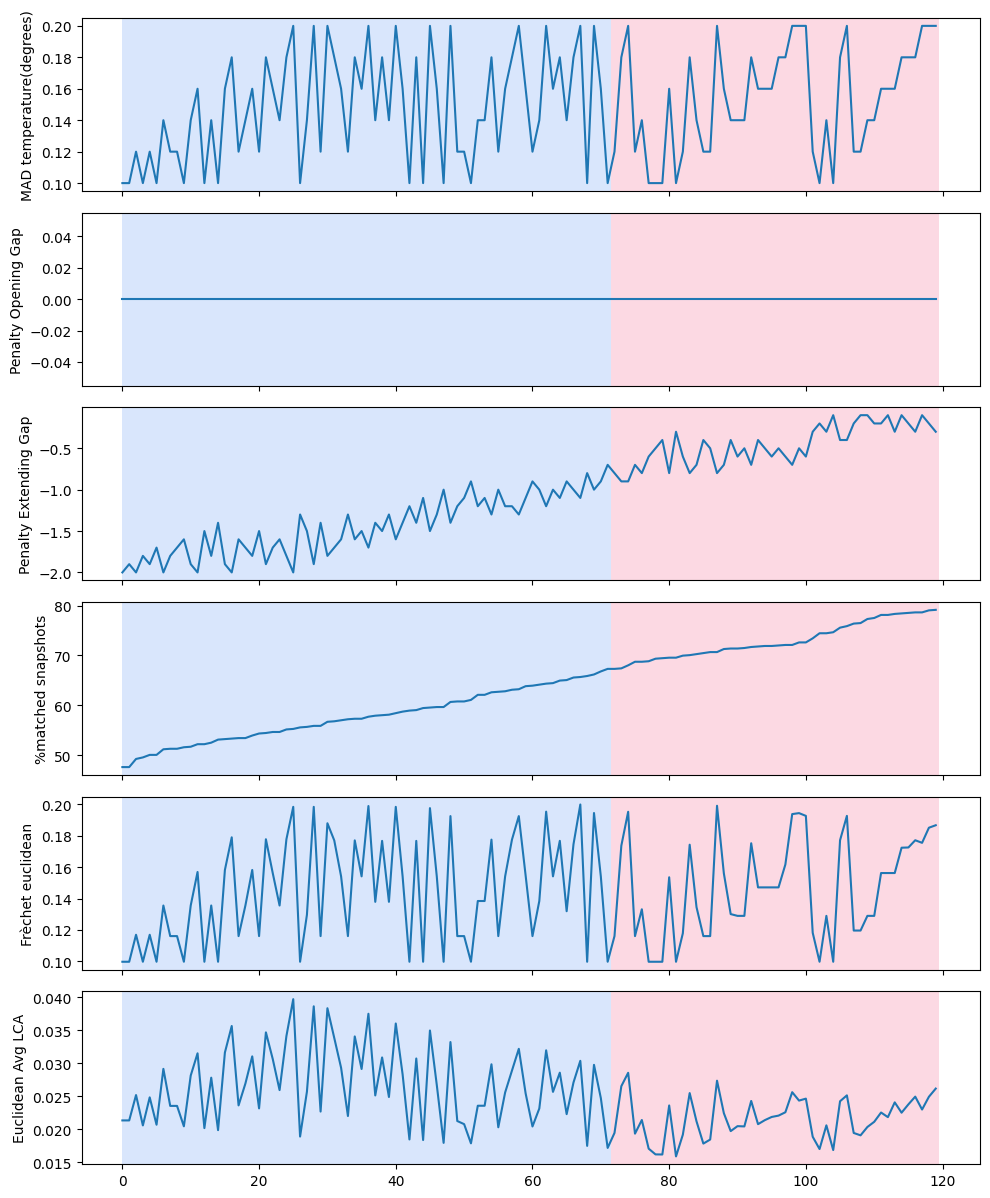

In [114]:
df = df.sort_values(f'mad_{param_interest}')
df = df.sort_values('percentage_matched_snapshots')

# Separate the input variables (X) and the output variable (Y)
X3 = df[f'mad_{param_interest}'].values
X1 = df['init_gap'].values
X2 = df['cont_gap'].values
Y1 = df['percentage_matched_snapshots']
Y2 = df['frechet_euclidean']
Y3 = df['p2p_mean_euclidean_mean']

# Combine the input signals and response variable into a signal matrix
signals = np.column_stack(( X3, X1, X2, Y1, Y2, Y3))

# Perform change point detection
model = "l2"  # Select the model for change point detection (e.g., "l2", "rbf")
algo = rpt.Dynp(model=model, min_size=3, jump=5)
result = algo.fit_predict(signals, 3)

# Manually set a change point at a specific position
#change_point_position = 100  # Set the desired position
#result[change_point_position] = 1  # Set the change point label at the position

#print(result)
result = [72, 120]

# Plot the data and change point detection results
_, axs = rpt.display(signals, result)

axs[0].set_ylabel(f'MAD {param_interest}')
axs[1].set_ylabel('Penalty Opening Gap')
axs[2].set_ylabel('Penalty Extending Gap')
axs[3].set_ylabel('%matched snapshots')
axs[4].set_ylabel('Frèchet euclidean')
axs[5].set_ylabel('Euclidean Avg LCA')

plt.tight_layout()
plt.savefig(f'{output_directory}/output_{gap_type}_a_{os.path.splitext(file)[0]}.pdf', format='pdf')
plt.show()

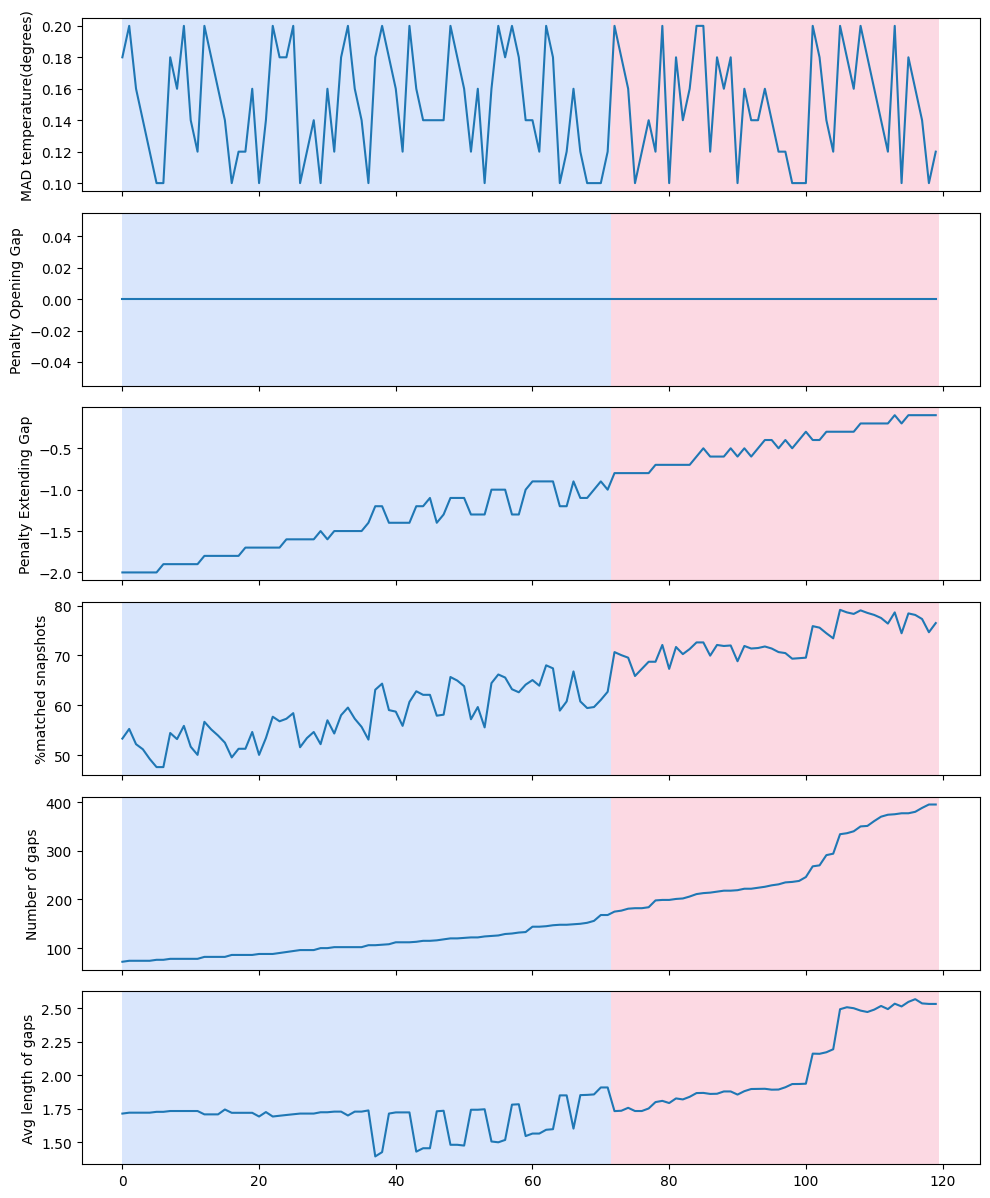

In [115]:
df = df.sort_values(f'mad_{param_interest}')
df = df.sort_values('number_of_gaps')

# Separate the input variables (X) and the output variable (Y)
X3 = df[f'mad_{param_interest}'].values
X1 = df['init_gap'].values
X2 = df['cont_gap'].values
Y1 = df['percentage_matched_snapshots']
Y4 = df['number_of_gaps']
Y6 = df['mean_length_gaps_mean']

# Combine the input signals and response variable into a signal matrix
signals = np.column_stack((X3, X1, X2, Y1, Y4, Y6))

# Perform change point detection
model = "l2"  # Select the model for change point detection (e.g., "l2", "rbf")
algo = rpt.Dynp(model=model, min_size=3, jump=5)
result = algo.fit_predict(signals, 3)
#print(result)

result = [72 ,120]

# Plot the data and change point detection results
_, axs = rpt.display(signals, result)

axs[0].set_ylabel(f'MAD {param_interest}')
axs[1].set_ylabel('Penalty Opening Gap')
axs[2].set_ylabel('Penalty Extending Gap')
axs[3].set_ylabel('%matched snapshots')
axs[4].set_ylabel('Number of gaps')
axs[5].set_ylabel('Avg length of gaps')

plt.tight_layout()
plt.savefig(f'{output_directory}/output_{gap_type}_b_{os.path.splitext(file)[0]}.pdf', format='pdf')
plt.show()